In [1]:
import numpy as np
import scipy as sp
from scipy.special import expit
from scipy.integrate import quad
from scipy.constants import *

from IDRIM.constants import *
from IDRIM.relations import *

import matplotlib.pyplot as plt

In [2]:
Frequency_array = np.linspace(150, 300, 1000)*1e12*2*pi
PermJustus = Permittivity(Frequency_array, wp0)

In [3]:
def Mu_Integrand(E, mu_T, T):
    return FermiDirac(E, mu_T, T)*TCO_DOS(E)

def Mu_Integrate(mu_T, T):
    return quad(Mu_Integrand, 0, 100*e, args=(mu_T, T))[0]

def Mu_Function(mu_T, T, N):
    return Mu_Integrate(mu_T, T)-N

In [4]:
def DOS_Integrand(E, m0):
     return (1/(2*pi**2))*(2*m0/hbar**2)**1.5*(E+eta*E**2)**0.5*(1+2*eta*E)
    
def NumberDensityT0(m0, Ef):
    return quad(DOS_Integrand, 0, Ef, args=(m0))[0]

def WeightedMassCon(E):
    return (((2*a**2)/(3*hbar**2*(E+a)))+(a**4)/(3*hbar**2*(E+a)**3))

def IntegrandC1a(E, mu, T):
    return ((E+eta*E**2)**0.5)*(1+2*eta*E)*FermiDirac(E, mu, T)*WeightedMassCon(E)

def IntegrateC1a(mu, T):
    return quad(IntegrandC1a, 0, 100*e, args=(mu, T))[0]

def IntegrandC2(E, mu, T):
    return ((E+eta*E**2)**0.5)*(1+2*eta*E)*FermiDirac(E, mu, T)

def IntegrateC2(mu, T):
    return quad(IntegrandC2, 0, 100*e, args=(mu, T))[0]

def Mass(C1, C2):
    return wp0**4 * ((epsilon_0**2 *pi**4)/(C1**2 * C2**2 * e**4 * eta**2 *hbar**4))*((hbar**2)/(2))**3

In [5]:
def EffMassWeightedLoc(E, b):
    return (((2/3)*a**2/(hbar**2*b*(E+a))) + ((1/3)*(a**4)/(hbar**2*b*((E+a))**3)))**(-1)

def AvgEffMassIntegrandLoc(E, mu_T, T, b):
    return (1/N)*(TCO_DOS(E)*FermiDirac(E, mu_T, T))/(EffMassWeightedLoc(E, b))

def AvgEffMassIntegrateLoc(mu_T, T, b):
    return 1/(quad(AvgEffMassIntegrandLoc, 0, 100*e, args=(mu_T, T, b))[0])

Minimum Effective Mass: 0.22069806462941993 m_e
Number Density at 0 Kelvin: 7.959978255227007e+26
Chemical Potential at 300K: [0.99878644] eV


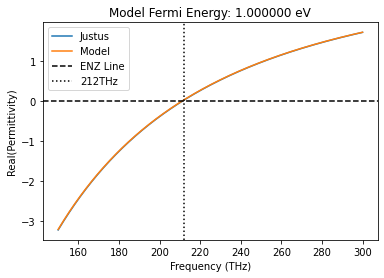

In [16]:
FermiEnergy = 1*e

C1 = (IntegrateC1a(FermiEnergy, 300))/(IntegrateC2(FermiEnergy, 300))
C2 = IntegrateC2(FermiEnergy, 300)
m0 = Mass(C1, C2)
bloc =  (m0)/(2*eta*hbar**2)

print("Minimum Effective Mass:", m0/m_e, "m_e")
Nlocal = NumberDensityT0(m0, FermiEnergy)
print("Number Density at 0 Kelvin:",Nlocal)
mu300 = fsolve(Mu_Function, 0.5*e, args=(300, Nlocal))
print("Chemical Potential at 300K:", mu300/eV, "eV")

m_avg = AvgEffMassIntegrateLoc(mu300, 300, bloc) #Calculate average effective mass.
PlasmaFreq = np.sqrt((N*e**2)/(epsilon_0*m_avg))
PermModel = Permittivity(Frequency_array, PlasmaFreq)
   
plt.plot(Frequency_array/(1e12*2*pi), PermJustus.real, label="Justus")
plt.plot(Frequency_array/(1e12*2*pi), PermModel.real, label="Model")
plt.axhline(0, color="black", linestyle="dashed", label="ENZ Line")
plt.axvline(212, color="black", linestyle="dotted", label="212THz")
plt.xlabel("Frequency (THz)")
plt.ylabel("Real(Permittivity)")
plt.title('Model Fermi Energy: %f eV' % (FermiEnergy/eV))
plt.legend()